In [24]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.impute import SimpleImputer
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import roc_curve, auc

In [19]:

dfnum = pd.read_csv('numeric_data_agri.csv')

In [20]:

df_clean = dfnum.dropna(subset=['ckd__probable_sample_1'])

y = df_clean['ckd__probable_sample_1']
X = df_clean.drop(columns=['ckd_code_sample_1', 'ckd__probable_sample_1', 'ckd_epi_sample_1'])

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, stratify=y, random_state=42
)

pipeline = make_pipeline(
    SimpleImputer(strategy='median'),  # Replace NaNs with mean values
    GradientBoostingClassifier(
        n_estimators=100,
        learning_rate=0.1,
        max_depth=3,
        random_state=42
    )
)

# Fit and predict
pipeline.fit(X_train, y_train)
y_pred = pipeline.predict(X_test)

# Evaluation
print(classification_report(y_test, y_pred, zero_division=0))
print(confusion_matrix(y_test, y_pred))


              precision    recall  f1-score   support

         0.0       0.98      1.00      0.99       523
         1.0       1.00      0.92      0.96       128

    accuracy                           0.98       651
   macro avg       0.99      0.96      0.97       651
weighted avg       0.98      0.98      0.98       651

[[523   0]
 [ 10 118]]


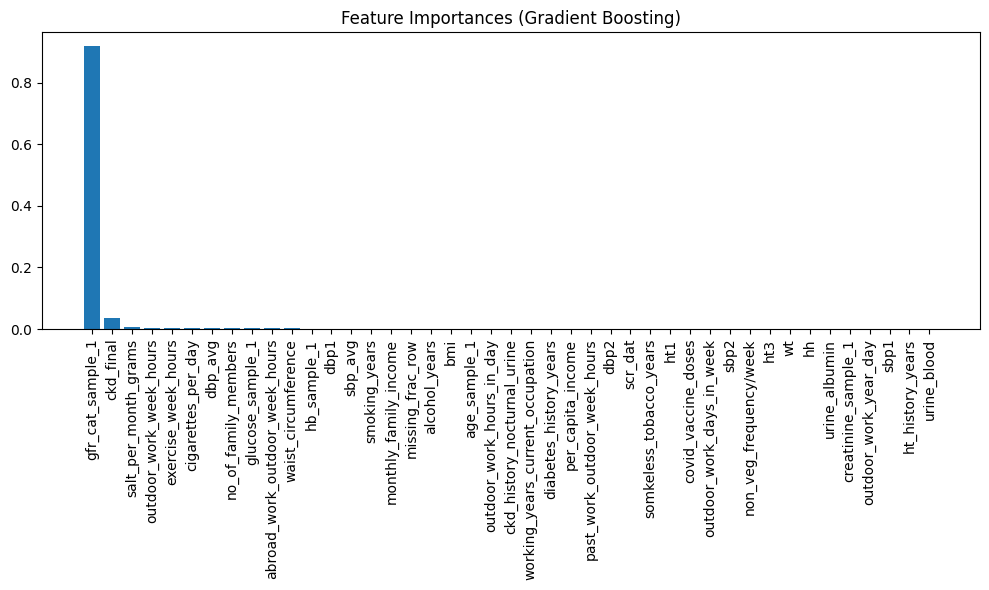

In [ ]:


gb_model = pipeline.named_steps['gradientboostingclassifier']
importances = gb_model.feature_importances_
feature_names = X.columns

plt.figure(figsize=(10, 6))
indices = np.argsort(importances)[::-1]
plt.bar(range(len(importances)), importances[indices], align='center')
plt.xticks(range(len(importances)), feature_names[indices], rotation=90)
plt.tight_layout()
plt.show()


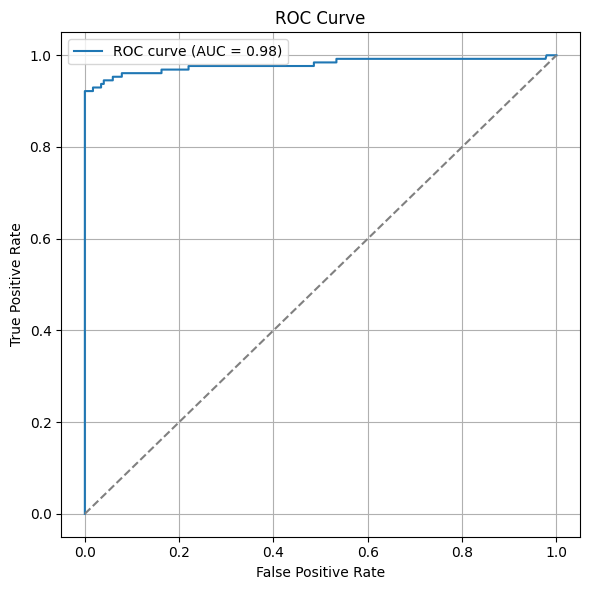

In [25]:

y_proba = pipeline.predict_proba(X_test)[:, 1]
fpr, tpr, _ = roc_curve(y_test, y_proba)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(6, 6))
plt.plot(fpr, tpr, label=f'ROC curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], linestyle='--', color='gray')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()
